In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore") 

In [9]:
train=pd.read_csv("train.csv")

In [10]:
train.shape

(252, 30)

In [11]:
test=pd.read_csv("test.csv")
test.shape

(76, 30)

In [12]:
train.head(7)

,GameID,Team1,Team2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn1Team1NOPR>25,SR>125",...,"Inn2Team2NOPR<25,SR>125",Inn2Team2Total4s,Inn2Team2Total6s,Inn2Team2MaxStrikeRate_ALLBatsmen,Inn2Team1NoPfastbowlers,Inn2Team1NoPSpinners,Inn2Team1wicketstaken_catches_runout,Inn2Team1wicketstaken_ bowled _lbw_caughtbykeeper_stumping,Inn2Team1Extrasconcededin_wides_No Balls,Winner
0,1,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-01-2012,20:00:00,6,0.49,1,...,0,3,3,120.00,5,0,6,4,11,1
1,2,Electronic City Power Savers,Silkboard Slow Movers,Silkboard,2,01-02-2012,17:00:00,7,0.44,3,...,2,18,9,215.15,4,1,4,0,5,1
2,3,Indranagar Pub Watchers,Sarjapur Water Tankers,Sarjapur,3,01-03-2012,20:30:00,11,0.23,2,...,1,18,1,300.00,3,3,0,1,10,0
3,4,Bellandur Froth Fighters,Koramangala Traffic Jammers,Koramangala,4,01-04-2012,16:00:00,6,0.61,0,...,0,5,4,100.00,4,2,3,2,16,0
4,5,Marathalli Chokers,Whitefield Water Loggers,Marathalli,5,01-05-2012,20:00:00,6,0.56,3,...,3,15,6,205.26,4,2,4,1,5,0
5,6,Silkboard Slow Movers,Indranagar Pub Watchers,Indranagar,6,01-06-2012,20:00:00,11,0.19,1,...,2,17,7,155.10,5,1,2,2,10,0
6,7,Bellandur Froth Fighters,Sarjapur Water Tankers,Bellandur,7,01-07-2012,20:00:00,8,0.20,1,...,1,15,6,229.26,3,3,0,1,7,0


In [13]:
train[pd.isnull(train['Winner'])]

,GameID,Team1,Team2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn1Team1NOPR>25,SR>125",...,"Inn2Team2NOPR<25,SR>125",Inn2Team2Total4s,Inn2Team2Total6s,Inn2Team2MaxStrikeRate_ALLBatsmen,Inn2Team1NoPfastbowlers,Inn2Team1NoPSpinners,Inn2Team1wicketstaken_catches_runout,Inn2Team1wicketstaken_ bowled _lbw_caughtbykeeper_stumping,Inn2Team1Extrasconcededin_wides_No Balls,Winner


In [14]:
train.replace(['Koramangala Traffic Jammers','Electronic City Power Savers','Indranagar Pub Watchers','Bellandur Froth Fighters','Marathalli Chokers ',
                 'Silkboard Slow Movers','HSR High Rent Payers','Whitefield Water Loggers ','Sarjapur Water Tankers','Airport Flyers','Forum Fans']
                ,['KTJ','ECP','IPW','BFF','MC','SSM','HR','WWL','SWT','AF','FF'],inplace=True)

In [16]:
train.Team2.head(10)

0    WWL
1    SSM
2    SWT
3    KTJ
4    WWL
5    IPW
6    SWT
7     MC
8    IPW
9     MC
Name: Team2, dtype: object

In [17]:
test.replace(['Koramangala Traffic Jammers','Electronic City Power Savers','Indranagar Pub Watchers','Bellandur Froth Fighters','Marathalli Chokers ',
                 'Silkboard Slow Movers','HSR High Rent Payers','Whitefield Water Loggers ','Sarjapur Water Tankers','Airport Flyers','Forum Fans']
                ,['KTJ','ECP','IPW','BFF','MC','SSM','HR','WWL','SWT','AF','FF'],inplace=True)

In [18]:
test.Team1.head(10)

0    ECP
1    KTJ
2     HR
3    IPW
4    WWL
5    ECP
6    IPW
7     HR
8    BFF
9    KTJ
Name: Team1, dtype: object

In [19]:
train.replace(['Koramangala','Electronic City','Indranagar','Bellandur','Marathalli',
                 'Silkboard','HSR','Whitefield','Sarjapur']
                ,['Kg','Ec','Id','Bd','Mt','Sb','Hsr','Wf','Sp'],inplace=True)

In [20]:
test.replace(['Koramangala','Electronic City','Indranagar','Bellandur','Marathalli',
                 'Silkboard','HSR','Whitefield','Sarjapur']
                ,['Kg','Ec','Id','Bd','Mt','Sb','Hsr','Wf','Sp'],inplace=True)

In [21]:
train.City.head(10)

0    Wf
1    Sb
2    Sp
3    Kg
4    Mt
5    Id
6    Bd
7    Ec
8    Bd
9    Sb
Name: City, dtype: object

In [22]:
test.City.head(10)

0     Ec
1     Kg
2     Mt
3     Id
4     Wf
5     Bd
6     Id
7    Hsr
8    Hsr
9     Wf
Name: City, dtype: object

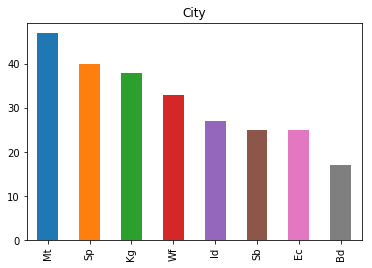

In [23]:
train['City'].value_counts().plot.bar(title = "City")

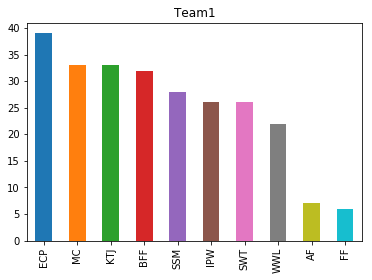

In [24]:
train['Team1'].value_counts().plot.bar(title = "Team1")

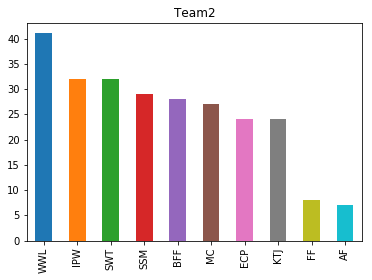

In [25]:
train['Team2'].value_counts().plot.bar(title = "Team2")

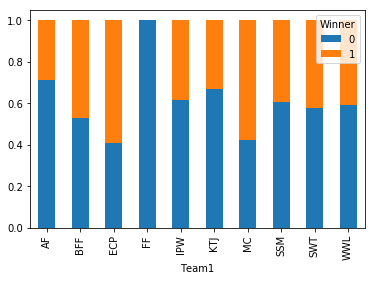

In [26]:
Team1=pd.crosstab(train['Team1'],train['Winner'])
Team1.div(Team1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

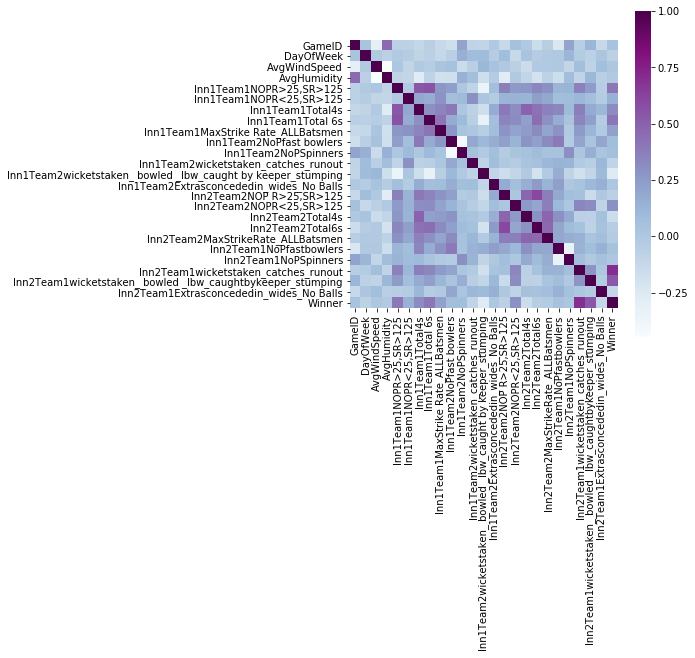

In [27]:
matrix = train.corr()
plt.subplots(figsize=(6, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu");

In [28]:
encode = {'Team1': {'KTJ':1,'ECP':2,'IPW':3,'BFF':4,'MC':5,'SSM':6,'HR':7,'WWL':8,'SWT':9,'AF':10,'FF':11},
          'Team2': {'KTJ':1,'ECP':2,'IPW':3,'BFF':4,'MC':5,'SSM':6,'HR':7,'WWL':8,'SWT':9,'AF':10,'FF':11}}

In [29]:
test.replace(encode, inplace=True)

In [30]:
train.replace(encode, inplace=True)

In [31]:
test.Team2.head()

0    5
1    9
2    5
3    6
4    9
Name: Team2, dtype: int64

In [32]:
train.City.head(20)

0     Wf
1     Sb
2     Sp
3     Kg
4     Mt
5     Id
6     Bd
7     Ec
8     Bd
9     Sb
10    Ec
11    Wf
12    Sb
13    Mt
14    Wf
15    Kg
16    Sp
17    Id
18    Bd
19    Ec
Name: City, dtype: object

In [33]:
encode = {'City': {'Kg' : 1,'Ec' : 2,'Id' : 3,'Bd' : 4,'Mt' : 5,'Sb' : 6,'Hsr' : 7,'Wf' : 8,'Sp' : 9}}

In [34]:
train.replace(encode, inplace=True)

In [36]:
test.replace(encode, inplace=True)

In [37]:
train.head(20)

,GameID,Team1,Team2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn1Team1NOPR>25,SR>125",...,"Inn2Team2NOPR<25,SR>125",Inn2Team2Total4s,Inn2Team2Total6s,Inn2Team2MaxStrikeRate_ALLBatsmen,Inn2Team1NoPfastbowlers,Inn2Team1NoPSpinners,Inn2Team1wicketstaken_catches_runout,Inn2Team1wicketstaken_ bowled _lbw_caughtbykeeper_stumping,Inn2Team1Extrasconcededin_wides_No Balls,Winner
0,1,1,8,8,1,01-01-2012,20:00:00,6,0.49,1,...,0,3,3,120.00,5,0,6,4,11,1
1,2,2,6,6,2,01-02-2012,17:00:00,7,0.44,3,...,2,18,9,215.15,4,1,4,0,5,1
2,3,3,9,9,3,01-03-2012,20:30:00,11,0.23,2,...,1,18,1,300.00,3,3,0,1,10,0
3,4,4,1,1,4,01-04-2012,16:00:00,6,0.61,0,...,0,5,4,100.00,4,2,3,2,16,0
4,5,5,8,5,5,01-05-2012,20:00:00,6,0.56,3,...,3,15,6,205.26,4,2,4,1,5,0
5,6,6,3,3,6,01-06-2012,20:00:00,11,0.19,1,...,2,17,7,155.10,5,1,2,2,10,0
6,7,4,9,4,7,01-07-2012,20:00:00,8,0.20,1,...,1,15,6,229.26,3,3,0,1,7,0
7,8,2,5,2,1,01-08-2012,20:00:00,5,0.73,3,...,3,19,8,225.00,4,1,5,2,8,1
8,9,4,3,4,2,01-09-2012,20:00:00,8,0.20,1,...,3,18,14,244.44,3,3,5,2,3,0
9,10,6,5,6,3,01-10-2012,20:00:00,10,0.52,1,...,2,12,4,170.00,4,1,5,3,6,1


In [38]:
test.head(20)

,GameID,Team1,Team2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn1Team1NOPR>25,SR>125",...,"Inn2Team2NOPR<25,SR>125",Inn2Team2Total4s,Inn2Team2Total6s,Inn2Team2MaxStrikeRate_ALLBatsmen,Inn2Team1NoPfastbowlers,Inn2Team1NoPSpinners,Inn2Team1wicketstaken_catches_runout,Inn2Team1wicketstaken_ bowled _lbw_caughtbykeeper_stumping,Inn2Team1Extrasconcededin_wides_No Balls,Winner
0,253,2,5,2,6,01-01-2016,20:00:00,5,0.62,1,...,0,9,5,142.85,3,3,1,1,3,0
1,254,1,9,1,7,01-02-2016,20:00:00,6,0.66,1,...,1,8,4,210.00,3,2,1,1,1,0
2,255,7,5,5,1,01-03-2016,16:00:00,5,0.64,0,...,1,8,1,166.66,4,2,2,7,4,1
3,256,3,6,3,2,01-04-2016,20:00:00,5,0.64,1,...,3,14,4,166.66,2,4,6,3,2,1
4,257,8,9,8,3,01-05-2016,16:00:00,5,0.62,2,...,2,13,2,160.00,4,2,6,1,2,1
5,258,2,4,4,4,01-06-2016,20:00:00,5,0.62,3,...,3,11,4,187.50,3,4,5,5,3,1
6,259,3,1,3,5,01-07-2016,16:00:00,5,0.60,2,...,0,10,5,227.27,2,3,4,6,5,1
7,260,7,6,7,6,01-08-2016,20:00:00,5,0.60,0,...,1,11,4,200.00,4,2,6,2,5,1
8,261,4,5,7,7,01-09-2016,20:00:00,5,0.63,2,...,2,8,8,175.00,2,3,3,2,0,0
9,262,1,8,8,1,01-10-2016,16:00:00,5,0.64,2,...,2,8,3,166.66,4,1,6,3,8,1


In [39]:
train["Team1"] = pd.to_numeric(train["Team1"])

In [40]:
train["Team2"] = pd.to_numeric(train["Team2"])

In [41]:
train["Team2"] = pd.to_numeric(train["Team2"])

In [42]:
test["Team2"] = pd.to_numeric(test["Team2"])

In [43]:
train["City"] = pd.to_numeric(train["City"])

In [44]:
test["City"] = pd.to_numeric(test["City"])

In [45]:
train.dtypes

GameID                                                            int64
Team1                                                             int64
Team2                                                             int64
City                                                              int64
DayOfWeek                                                         int64
DateOfGame                                                       object
TimeOfGame                                                       object
AvgWindSpeed                                                      int64
AvgHumidity                                                     float64
Inn1Team1NOPR>25,SR>125                                           int64
Inn1Team1NOPR<25,SR>125                                           int64
Inn1Team1Total4s                                                  int64
Inn1Team1Total 6s                                                 int64
Inn1Team1MaxStrike Rate_ALLBatsmen                              

In [46]:
test.dtypes

GameID                                                            int64
Team1                                                             int64
Team2                                                             int64
City                                                              int64
DayOfWeek                                                         int64
DateOfGame                                                       object
TimeOfGame                                                       object
AvgWindSpeed                                                      int64
AvgHumidity                                                     float64
Inn1Team1NOPR>25,SR>125                                           int64
Inn1Team1NOPR<25,SR>125                                           int64
Inn1Team1Total4s                                                  int64
Inn1Team1Total 6s                                                 int64
Inn1Team1MaxStrike Rate_ALLBatsmen                              

In [47]:
train.shape

(252, 30)

In [48]:
test.shape

(76, 30)

In [49]:
X_train = train.drop(["Winner","DateOfGame","TimeOfGame","GameID"],axis = 1)

In [50]:
Y_train = train.Winner

In [51]:
X_test = test.drop(["Winner","DateOfGame","TimeOfGame","GameID"],axis = 1)

In [52]:
Y_test = test.Winner

In [53]:
from xgboost import XGBClassifier

In [115]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.002, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=6000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [116]:
X_train.shape

(252, 26)

In [117]:
X_test.shape

(76, 26)

In [118]:
X_test.dtypes

Team1                                                             int64
Team2                                                             int64
City                                                              int64
DayOfWeek                                                         int64
AvgWindSpeed                                                      int64
AvgHumidity                                                     float64
Inn1Team1NOPR>25,SR>125                                           int64
Inn1Team1NOPR_25,SR>125                                           int64
Inn1Team1Total4s                                                  int64
Inn1Team1Total 6s                                                 int64
Inn1Team1MaxStrike Rate_ALLBatsmen                              float64
Inn1Team2NoPfast bowlers                                          int64
Inn1Team2NoPSpinners                                              int64
Inn1Team2wicketstaken_catches_runout                            

In [119]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [120]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [121]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.002, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=6000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [122]:
pred_test = model.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test,pred_test)
print(score)

0.9473684210526315


In [124]:
pred_test

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [136]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.002, n_estimators=6000, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X_train, Y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.3min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.002, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=6000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [137]:
from matplotlib import pyplot

print(model.feature_importances_)

[0.0323824  0.01284754 0.00583081 0.0267163  0.00075768 0.03590723
 0.03689551 0.03116353 0.10096851 0.07942417 0.0030307  0.00441428
 0.00764264 0.00378838 0.0084662  0.03692845 0.01581236 0.00319541
 0.0634471  0.0695085  0.05330083 0.00510607 0.00362367 0.16800633
 0.15407169 0.03676374]


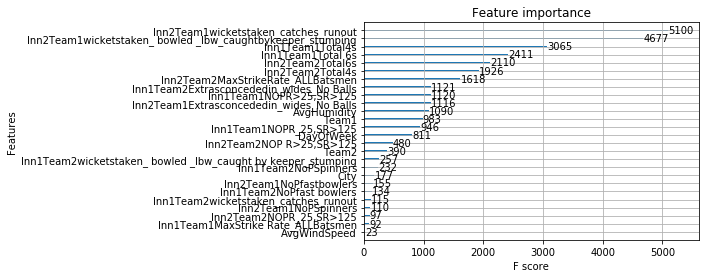

In [126]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model)
pyplot.show()

In [129]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
#from sklearn.grid_search import GridSearchCV

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, Y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [value for value in y_pred]
    accuracy = accuracy_score(Y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.5f%%" % (thresh, select_X_train.shape[1], accuracy*100))

Thresh=0.001, n=26, Accuracy: 94.73684%
Thresh=0.003, n=25, Accuracy: 94.73684%
Thresh=0.003, n=24, Accuracy: 94.73684%
Thresh=0.004, n=23, Accuracy: 94.73684%
Thresh=0.004, n=22, Accuracy: 94.73684%
Thresh=0.004, n=21, Accuracy: 94.73684%
Thresh=0.005, n=20, Accuracy: 94.73684%
Thresh=0.006, n=19, Accuracy: 94.73684%
Thresh=0.008, n=18, Accuracy: 94.73684%
Thresh=0.008, n=17, Accuracy: 94.73684%
Thresh=0.013, n=16, Accuracy: 94.73684%
Thresh=0.016, n=15, Accuracy: 94.73684%
Thresh=0.027, n=14, Accuracy: 93.42105%
Thresh=0.031, n=13, Accuracy: 93.42105%
Thresh=0.032, n=12, Accuracy: 94.73684%
Thresh=0.036, n=11, Accuracy: 94.73684%
Thresh=0.037, n=10, Accuracy: 94.73684%
Thresh=0.037, n=9, Accuracy: 93.42105%
Thresh=0.037, n=8, Accuracy: 94.73684%
Thresh=0.053, n=7, Accuracy: 96.05263%
Thresh=0.063, n=6, Accuracy: 96.05263%
Thresh=0.070, n=5, Accuracy: 92.10526%
Thresh=0.079, n=4, Accuracy: 86.84211%
Thresh=0.101, n=3, Accuracy: 88.15789%
Thresh=0.154, n=2, Accuracy: 88.15789%
Thresh=0

In [134]:
thresholds = sort(model.feature_importances_)
selection = SelectFromModel(model, threshold=0.063, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, Y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.5f%%" % (thresh, select_X_train.shape[1], accuracy*100))

Thresh=0.168, n=6, Accuracy: 96.05263%


In [163]:
y_pred_prob = selection_model.predict_proba(select_X_test)
print(y_pred_prob)

[[0.9978179  0.00218214]
 [0.99406475 0.00593523]
 [0.2118612  0.7881388 ]
 [0.03437102 0.965629  ]
 [0.02042729 0.9795727 ]
 [0.0075295  0.9924705 ]
 [0.01454657 0.9854534 ]
 [0.0538981  0.9461019 ]
 [0.97545856 0.02454143]
 [0.00215805 0.99784195]
 [0.9955795  0.0044205 ]
 [0.01946056 0.98053944]
 [0.56028545 0.43971452]
 [0.98780483 0.01219518]
 [0.94022745 0.05977253]
 [0.97845197 0.02154801]
 [0.0259074  0.9740926 ]
 [0.00343049 0.9965695 ]
 [0.9729695  0.02703056]
 [0.6792794  0.3207206 ]
 [0.9569661  0.04303389]
 [0.9975213  0.00247875]
 [0.8808746  0.11912545]
 [0.01186627 0.9881337 ]
 [0.99488056 0.00511946]
 [0.9352686  0.06473142]
 [0.0110718  0.9889282 ]
 [0.79859275 0.20140724]
 [0.7697858  0.23021416]
 [0.00888288 0.9911171 ]
 [0.9973937  0.00260628]
 [0.9924766  0.00752341]
 [0.70178616 0.2982138 ]
 [0.9924766  0.00752341]
 [0.7103139  0.28968608]
 [0.04955    0.95045   ]
 [0.03803056 0.96196944]
 [0.28165305 0.71834695]
 [0.97493744 0.02506255]
 [0.7679736  0.23202641]


In [146]:
print(y_pred)

[0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 1 0]


In [164]:
np.savetxt("Pred.csv", y_pred, delimiter = " ")

In [144]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.002, n_estimators=6000, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X_train, Y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.2min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.002, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=6000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)